In [1]:
import tweepy

CONSUMER_KEY = ''
CONSUMER_SECRET = ''
ACCESS_TOKEN = ''
ACCESS_TOKEN_SECRET = ''

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

status = ""
api.update_status(status=status)


Status(_api=<tweepy.api.API object at 0x7f9dd5d72f50>, _json={'created_at': 'Tue Oct 05 10:16:09 +0000 2021', 'id': 1445331972318957575, 'id_str': '1445331972318957575', 'text': 'Testingsss1', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://help.twitter.com/en/using-twitter/how-to-tweet#source-labels" rel="nofollow">GraphAnalys</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 412997614, 'id_str': '412997614', 'name': 'Mojtaba Mirzadeh', 'screen_name': 'm_msd4', 'location': 'Tehran/Iran', 'description': 'Sr. iOS Developer at GSS International PJSC', 'url': 'https://t.co/guE7rUSZeg', 'entities': {'url': {'urls': [{'url': 'https://t.co/guE7rUSZeg', 'expanded_url': 'http://www.mojtabamirzadeh.ir', 'display_url': 'mojtabamirzadeh.ir', 'indices': [0, 23]}]}, 'description': {'urls': []

In [2]:
import pandas as pd
date_since_ = "2020-09-01"
tweets = tweepy.Cursor(api.search, 
                           q='فوتبال',
                           lang="fa"
                           ).items(1000)

users_locs = [[tweet.user.screen_name,tweet.text,tweet.created_at,tweet.retweet_count,tweet.user.id] for tweet in tweets]

tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user',"Text",'tweet.created','retweet','user.id'])

In [3]:
twitText=tweet_text['Text']
lookingFor='RT @'
itemsList=[]
for item in range(0, len(twitText)):
  if 'RT @' in twitText[item]:
    removedRT=twitText[item].split(lookingFor)[1].split(':')[0]

    itemsList.append(removedRT)
  else:
    itemsList.append('empty')

itemsList

tweet_text['RT_user']=itemsList
tweet_text=tweet_text[tweet_text['RT_user'] != 'empty']
tweet_text

,user,Text,tweet.created,retweet,user.id,RT_user
1,fanexoforever,RT @Exol362234060: @fanexoforever @weareoneEXO...,2021-10-05 10:15:42,1,1394974150729641990,Exol362234060
5,RahmatHaftado4,RT @salmaneshoon: #کشتی تو خون ماست، اسم حرکات...,2021-10-05 10:09:36,13,1392516013598642181,salmaneshoon
6,GeometryvCHANCE,RT @fatemisadr_ir: این که این سال‌ها کشتی به ج...,2021-10-05 10:09:20,1,1328384413688680449,fatemisadr_ir
8,arak1399,RT @60dool: اگر استرا میموند قطعا سپاهانیا و ه...,2021-10-05 10:07:59,2,2441774386,60dool
10,tut_arting,RT @gis_oo_parishon: مربی فوتبال بچه هام یمقدا...,2021-10-05 10:06:28,7,1250341827808395267,gis_oo_parishon
...,...,...,...,...,...,...
981,Siavashemami7,RT @Saeed_Juventino: جدا از افتخارات بیشتر، جا...,2021-10-04 11:41:21,13,865598262111330304,Saeed_Juventino
982,aawaatt,RT @aghaeifard: تیم‌ملی با امارات و کره‌جنوبی ...,2021-10-04 11:40:32,1,1132026805,aghaeifard
992,avardga,RT @Salman_nomy: رئیسی چنان خیابونها رو دیوارک...,2021-10-04 11:27:32,68,1383753112725327877,Salman_nomy
995,GhaderiSayeh,RT @bahar_ghafari: دوستامون تو #دیباچه دنبال ...,2021-10-04 11:25:12,8,1024770478844637184,bahar_ghafari


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
GFinal= nx.Graph()
GFinal = nx.from_pandas_edgelist(tweet_text,'user','RT_user', edge_attr='Text')

In [5]:
print(nx.info(GFinal)) 

Graph with 383 nodes and 310 edges


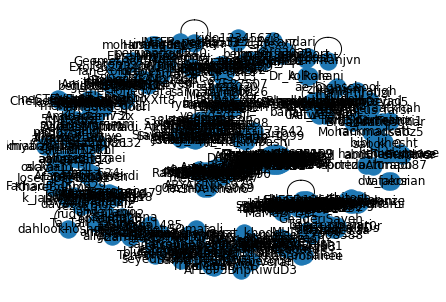

In [7]:
nx.draw(GFinal,with_labels=True)
plt.show()

In [8]:
import community.community_louvain as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

partition = community_louvain.best_partition(GFinal)
partition

{'0Ali_Asadi0': 60,
 '0blaueSeele0': 16,
 '1404_goleNarges': 7,
 '1984_limited': 7,
 '1Iranihastam': 22,
 '28Fatem': 7,
 '4061_j': 83,
 '5trategist': 19,
 '60dool': 3,
 '8mojdas8': 14,
 'A55523136': 33,
 'AFakhamati': 60,
 'APL8P3BnpRiwuD3': 46,
 'ARYAKING1979': 14,
 'AShirsavar': 16,
 'ATMCH18': 27,
 'Agha___mohammad': 16,
 'AhleTebriz': 12,
 'AliKonanni': 61,
 'Alimehrizi1': 54,
 'AlirezaMAhmadi': 28,
 'AmirHosein9191': 4,
 'AmirHosein_2x': 62,
 'Amir____95': 34,
 'Amireshooon': 14,
 'Amirhoseinradan': 34,
 'Aram_khodaverdi': 67,
 'Aramis_____': 18,
 'Archer22408632': 9,
 'AzamRasti': 51,
 'AzraSaharkhiz': 60,
 'Bahram56427953': 39,
 'Barf60835421': 16,
 'Bazzar_kar': 17,
 'BlackMetalVahid': 60,
 'Blue_bird_far': 14,
 'Blue_coiler': 70,
 'Brdazimi': 37,
 'Chegu1357': 13,
 'Chelseaperson24': 64,
 'Civil21688126': 7,
 'DamashOffical': 28,
 'DaneMarjan': 16,
 'Daneshmorteza31': 7,
 'DdpAaMQ37GUFAfo': 16,
 'Dr_A_Rohani': 75,
 'Dr_raisi_fan': 7,
 'EFZEDESEH': 13,
 'ESFANDYARAN': 56,
 'Ear

In [9]:
twitText=tweet_text['user']
part=[]
for items in twitText:
  for i in partition.keys():
    if (items==i):
      part.append(partition[i])
part
tweet_text['part']=part
tweet_text

,user,Text,tweet.created,retweet,user.id,RT_user,part
1,fanexoforever,RT @Exol362234060: @fanexoforever @weareoneEXO...,2021-10-05 10:15:42,1,1394974150729641990,Exol362234060,0
5,RahmatHaftado4,RT @salmaneshoon: #کشتی تو خون ماست، اسم حرکات...,2021-10-05 10:09:36,13,1392516013598642181,salmaneshoon,60
6,GeometryvCHANCE,RT @fatemisadr_ir: این که این سال‌ها کشتی به ج...,2021-10-05 10:09:20,1,1328384413688680449,fatemisadr_ir,2
8,arak1399,RT @60dool: اگر استرا میموند قطعا سپاهانیا و ه...,2021-10-05 10:07:59,2,2441774386,60dool,3
10,tut_arting,RT @gis_oo_parishon: مربی فوتبال بچه هام یمقدا...,2021-10-05 10:06:28,7,1250341827808395267,gis_oo_parishon,4
...,...,...,...,...,...,...,...
981,Siavashemami7,RT @Saeed_Juventino: جدا از افتخارات بیشتر، جا...,2021-10-04 11:41:21,13,865598262111330304,Saeed_Juventino,70
982,aawaatt,RT @aghaeifard: تیم‌ملی با امارات و کره‌جنوبی ...,2021-10-04 11:40:32,1,1132026805,aghaeifard,71
992,avardga,RT @Salman_nomy: رئیسی چنان خیابونها رو دیوارک...,2021-10-04 11:27:32,68,1383753112725327877,Salman_nomy,66
995,GhaderiSayeh,RT @bahar_ghafari: دوستامون تو #دیباچه دنبال ...,2021-10-04 11:25:12,8,1024770478844637184,bahar_ghafari,17


In [10]:
tweet_text['text_inclass'] = tweet_text.groupby(['part'])['Text'].transform(lambda x: ','.join(x))
tweet_text

,user,Text,tweet.created,retweet,user.id,RT_user,part,text_inclass
1,fanexoforever,RT @Exol362234060: @fanexoforever @weareoneEXO...,2021-10-05 10:15:42,1,1394974150729641990,Exol362234060,0,RT @Exol362234060: @fanexoforever @weareoneEXO...
5,RahmatHaftado4,RT @salmaneshoon: #کشتی تو خون ماست، اسم حرکات...,2021-10-05 10:09:36,13,1392516013598642181,salmaneshoon,60,RT @salmaneshoon: #کشتی تو خون ماست، اسم حرکات...
6,GeometryvCHANCE,RT @fatemisadr_ir: این که این سال‌ها کشتی به ج...,2021-10-05 10:09:20,1,1328384413688680449,fatemisadr_ir,2,RT @fatemisadr_ir: این که این سال‌ها کشتی به ج...
8,arak1399,RT @60dool: اگر استرا میموند قطعا سپاهانیا و ه...,2021-10-05 10:07:59,2,2441774386,60dool,3,RT @60dool: اگر استرا میموند قطعا سپاهانیا و ه...
10,tut_arting,RT @gis_oo_parishon: مربی فوتبال بچه هام یمقدا...,2021-10-05 10:06:28,7,1250341827808395267,gis_oo_parishon,4,RT @gis_oo_parishon: مربی فوتبال بچه هام یمقدا...
...,...,...,...,...,...,...,...,...
981,Siavashemami7,RT @Saeed_Juventino: جدا از افتخارات بیشتر، جا...,2021-10-04 11:41:21,13,865598262111330304,Saeed_Juventino,70,RT @Chegu1357: صحبت از اصالت و برند برتر شد\nت...
982,aawaatt,RT @aghaeifard: تیم‌ملی با امارات و کره‌جنوبی ...,2021-10-04 11:40:32,1,1132026805,aghaeifard,71,RT @MortezRezaei: محمد درخشنده که انتقادهای من...
992,avardga,RT @Salman_nomy: رئیسی چنان خیابونها رو دیوارک...,2021-10-04 11:27:32,68,1383753112725327877,Salman_nomy,66,RT @Salman_nomy: رئیسی چنان خیابونها رو دیوارک...
995,GhaderiSayeh,RT @bahar_ghafari: دوستامون تو #دیباچه دنبال ...,2021-10-04 11:25:12,8,1024770478844637184,bahar_ghafari,17,RT @bahar_ghafari: دوستامون تو #دیباچه دنبال ...


In [11]:
def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist

In [12]:
sentences=[]
for sentence in tweet_text['text_inclass']:
  sent=' '.join(unique_list(sentence.split()))
  sentences.append(sent)
sentences
tweet_text['Text_Class']= sentences
tweet_text


,user,Text,tweet.created,retweet,user.id,RT_user,part,text_inclass,Text_Class
1,fanexoforever,RT @Exol362234060: @fanexoforever @weareoneEXO...,2021-10-05 10:15:42,1,1394974150729641990,Exol362234060,0,RT @Exol362234060: @fanexoforever @weareoneEXO...,RT @Exol362234060: @fanexoforever @weareoneEXO...
5,RahmatHaftado4,RT @salmaneshoon: #کشتی تو خون ماست، اسم حرکات...,2021-10-05 10:09:36,13,1392516013598642181,salmaneshoon,60,RT @salmaneshoon: #کشتی تو خون ماست، اسم حرکات...,RT @salmaneshoon: #کشتی تو خون ماست، اسم حرکات...
6,GeometryvCHANCE,RT @fatemisadr_ir: این که این سال‌ها کشتی به ج...,2021-10-05 10:09:20,1,1328384413688680449,fatemisadr_ir,2,RT @fatemisadr_ir: این که این سال‌ها کشتی به ج...,RT @fatemisadr_ir: این که سال‌ها کشتی به جوان‌...
8,arak1399,RT @60dool: اگر استرا میموند قطعا سپاهانیا و ه...,2021-10-05 10:07:59,2,2441774386,60dool,3,RT @60dool: اگر استرا میموند قطعا سپاهانیا و ه...,RT @60dool: اگر استرا میموند قطعا سپاهانیا و ه...
10,tut_arting,RT @gis_oo_parishon: مربی فوتبال بچه هام یمقدا...,2021-10-05 10:06:28,7,1250341827808395267,gis_oo_parishon,4,RT @gis_oo_parishon: مربی فوتبال بچه هام یمقدا...,RT @gis_oo_parishon: مربی فوتبال بچه هام یمقدا...
...,...,...,...,...,...,...,...,...,...
981,Siavashemami7,RT @Saeed_Juventino: جدا از افتخارات بیشتر، جا...,2021-10-04 11:41:21,13,865598262111330304,Saeed_Juventino,70,RT @Chegu1357: صحبت از اصالت و برند برتر شد\nت...,RT @Chegu1357: صحبت از اصالت و برند برتر شد ته...
982,aawaatt,RT @aghaeifard: تیم‌ملی با امارات و کره‌جنوبی ...,2021-10-04 11:40:32,1,1132026805,aghaeifard,71,RT @MortezRezaei: محمد درخشنده که انتقادهای من...,RT @MortezRezaei: محمد درخشنده که انتقادهای من...
992,avardga,RT @Salman_nomy: رئیسی چنان خیابونها رو دیوارک...,2021-10-04 11:27:32,68,1383753112725327877,Salman_nomy,66,RT @Salman_nomy: رئیسی چنان خیابونها رو دیوارک...,RT @Salman_nomy: رئیسی چنان خیابونها رو دیوارک...
995,GhaderiSayeh,RT @bahar_ghafari: دوستامون تو #دیباچه دنبال ...,2021-10-04 11:25:12,8,1024770478844637184,bahar_ghafari,17,RT @bahar_ghafari: دوستامون تو #دیباچه دنبال ...,RT @bahar_ghafari: دوستامون تو #دیباچه دنبال #...


In [13]:
# -*- coding: utf-8 -*-
from __future__ import print_function
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import re

In [14]:
Stopword = ['همچنان', 'مدت', 'چیز', 'سایر', 'جا', 'طی', 'کل', 'کنونی', 'بیرون','های', 'مثلا', 'کامل','ها', 'کاملا','گیرد','شود','است', 'آنکه', 
            'موارد', 'واقعی', 'امور', 'اکنون', 'بطور', 'بخشی', 'تحت', 'چگونه', 'عدم', 'نوعی', 'حاضر', 'وضع', 'مقابل', 'کنار', 'خویش', 'نگاه', 'درون',
            'زمانی', 'بنابراین', 'تو', 'خیلی', 'بزرگ', 'خودش', 'جز', 'اینجا', 'مختلف', 'توسط', 'نوع', 'همچنین', 'آنجا', 'قبل', 'جناح', 'اینها', 'طور', 'شاید',
            'ایشان', 'جهت', 'طریق', 'مانند', 'پیدا', 'ممکن', 'کسانی', 'جای', 'کسی', 'غیر', 'بی', 'قابل', 'درباره', 'جدید', 'وقتی', 'اخیر', 'چرا', 'بیش',
            'روی', 'طرف', 'جریان', 'زیر', 'آنچه', 'البته', 'فقط', 'چیزی', 'چون', 'برابر', 'هنوز', 'بخش', 'زمینه', 'بین', 'بدون', 'استفاد', 'همان', 'نشان',
            'بسیاری', 'بعد', 'عمل', 'روز', 'اعلام', 'چند', 'آنان', 'بلکه', 'امروز', 'تمام', 'بیشتر', 'آیا', 'برخی', 'علیه', 'دیگری', 'ویژه', 'گذشته', 'انجام',
            'حتی', 'داده', 'راه', 'سوی', 'ولی', 'زمان', 'حال', 'تنها', 'بسیار', 'یعنی', 'عنوان', 'همین', 'هبچ', 'پیش', 'وی', 'یکی', 'اینکه', 'وجود'
            , 'شما', 'پس', 'چنین', 'میان', 'مورد', 'چه', 'اگر', 'همه', 'نه', 'دیگر', 'آنها', 'باید', 'هر', 'او', 'ما', 'من', 'تا', 'نیز', 'اما', 
            'یک', 'خود', 'بر', 'یا', 'هم','ای', 'را','دارد', 'این',"می", 'با','دارد','،',',','.', 'آن', 'برای', 'و', 'در', 'به', 'که', 'از']

In [15]:
vectorizer = TfidfVectorizer(strip_accents="unicode", use_idf=True, encoding='utf-8', stop_words=Stopword, ngram_range=(1, 2))
 
# Fit and transform
doc_term_matrix = vectorizer.fit_transform(tweet_text['Text_Class'].values.astype('U'))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ان', 'انان', 'انجا', 'انها', 'انچه', 'انکه', 'ایا'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [31]:
nmf = NMF(n_components=10, random_state=42)
nmf.fit(doc_term_matrix )

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [32]:
import random

for i in range(10):
    random_id = random.randint(0,len(vectorizer.get_feature_names()))
    print(vectorizer.get_feature_names()[random_id])

هک جقله
۳ساله مسابقات
sepah_fa
فینال
هاست
_کره جنوبی
حبس
rt jenezesht
حسن_یزدانی_ها میرویند
تمرینات


In [33]:
first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-10:]

In [34]:
for i in top_topic_words:
    print(vectorizer.get_feature_names()[i])

تصویر
هاست
هاست زمین
hkhonakdar حکایت
rt hkhonakdar
طلایی
فوتبال تصویر
rt دل
سبز فوتبال
دل


In [35]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['تصویر', 'هاست', 'هاست زمین', 'hkhonakdar حکایت', 'rt hkhonakdar', 'طلایی', 'فوتبال تصویر', 'rt دل', 'سبز فوتبال', 'دل']


Top 10 words for topic #1:
['تیم', 'https co', 'co', 'https', 'rt', 'کره', 'جنوبی', 'کره جنوبی', 'co wj6ojrtrrc', 'wj6ojrtrrc']


Top 10 words for topic #2:
['زبانزد', 'هیچ rt', 'هستش یادی', 'زبانزد سطح', 'خسروانی اسطوره', 'خسروانی', 'شرایط', 'یادی', 'rt', 'برند']


Top 10 words for topic #3:
['تبریک', 'ipnsdrrbvq rt', 'rt 8mojdas8', 'تبریک میگـــــــم', 'pw250wszia', 'co pw250wszia', 'rt', 'https co', 'co', 'https']


Top 10 words for topic #4:
['خون', 'حرکاتش فارسیه', 'حرکاتش', 'فارسیه', 'فارسیه اصلا', 'فرهنگ', 'فرهنگ رسیده', 'کشتی خون', 'عامل ببینم', '0ali_asadi0']


Top 10 words for topic #5:
['36 قهرمانی', 'زنان دختران', 'rt هست', 'ملی ایتالیا', 'کردم سه', 'کردم سپس', 'سه', 'rt', 'کردم', 'هست']


Top 10 words for topic #6:
['جنوبی ورزشگاه', 'خیابونها', 'rt ازاد', 'خیابونها رو', 'چنان خیابونها', 'چنان', 'مجوز حبس', 'دیوارکشی', 'رو دی

In [36]:
topic_values = nmf.transform(doc_term_matrix)
tweet_text['Topic'] = topic_values.argmax(axis=1)
tweet_text.head()

,index,user,Text,tweet.created,retweet,user.id,RT_user,part,text_inclass,Text_Class,Topic
0,1,fanexoforever,RT @Exol362234060: @fanexoforever @weareoneEXO...,2021-10-05 10:15:42,1,1394974150729641990,Exol362234060,0,RT @Exol362234060: @fanexoforever @weareoneEXO...,RT @Exol362234060: @fanexoforever @weareoneEXO...,9
1,5,RahmatHaftado4,RT @salmaneshoon: #کشتی تو خون ماست، اسم حرکات...,2021-10-05 10:09:36,13,1392516013598642181,salmaneshoon,60,RT @salmaneshoon: #کشتی تو خون ماست، اسم حرکات...,RT @salmaneshoon: #کشتی تو خون ماست، اسم حرکات...,4
2,6,GeometryvCHANCE,RT @fatemisadr_ir: این که این سال‌ها کشتی به ج...,2021-10-05 10:09:20,1,1328384413688680449,fatemisadr_ir,2,RT @fatemisadr_ir: این که این سال‌ها کشتی به ج...,RT @fatemisadr_ir: این که سال‌ها کشتی به جوان‌...,0
3,8,arak1399,RT @60dool: اگر استرا میموند قطعا سپاهانیا و ه...,2021-10-05 10:07:59,2,2441774386,60dool,3,RT @60dool: اگر استرا میموند قطعا سپاهانیا و ه...,RT @60dool: اگر استرا میموند قطعا سپاهانیا و ه...,8
4,10,tut_arting,RT @gis_oo_parishon: مربی فوتبال بچه هام یمقدا...,2021-10-05 10:06:28,7,1250341827808395267,gis_oo_parishon,4,RT @gis_oo_parishon: مربی فوتبال بچه هام یمقدا...,RT @gis_oo_parishon: مربی فوتبال بچه هام یمقدا...,8


In [37]:
tweet_text=tweet_text.reset_index()

In [41]:
tweet_text['Text_Class'][300]

'RT @Chegu1357: صحبت از اصالت و برند برتر شد تهران ۳ اردیبهشت ۱۳۵۰ ورزشگاه امجدیه تاج میزبان هامبورگ قلیچ خانی کارو حق وردیان در کنار ستار…,RT @Blue_coiler: استقلال باشگاهی با قدمت زبانزد سطح آسیاست که پرافتخارترین پرتماشاگرترین تیم ایرانه باید بهترین شرایط…,RT @_tajabi_: تا بِرند هستش یادی کنیم زنده\u200cیاد خسروانی یکی اسطوره\u200cهای فوتبال جهان رو به باشگاه دعوت کرده بود ستایش ایشون…,RT @Saeed_Juventino: جدا افتخارات بیشتر، جایگاهی داره اثری بر جریان ایران گذاشته، هیچ دیگر…,RT دیگر…'

In [42]:
tweet_text['Topic'][300]

2